In [ ]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Funciones de Activacion

- Heaviside (salto unitario):

In [ ]:
def heaviside(x: NDArray[np.float64]) -> NDArray[np.int32]:
    return (x > 0).astype(np.int32)

- Sigmoid:

In [ ]:
def sigmoid(x: NDArray[np.float64]) -> NDArray[np.float64]:
    return 1.0 / (1.0 + np.exp(-x))

In [ ]:
x = np.linspace(-10, 10, 100)

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$f(x)$')]

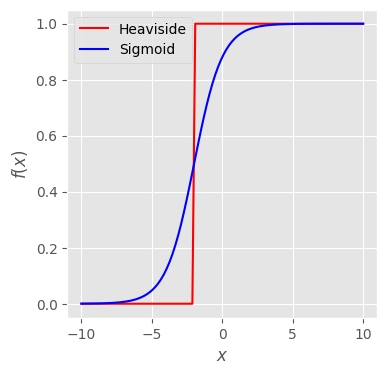

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x, heaviside(x + 2), color="r", label="Heaviside")
ax.plot(x, sigmoid(x+2), color="b", label="Sigmoid")
ax.legend()
ax.set(xlabel="$x$", ylabel="$f(x)$")

In [ ]:
x = np.logspace(-5, 2, 100)
x

array([1.00000000e-05, 1.17681195e-05, 1.38488637e-05, 1.62975083e-05,
       1.91791026e-05, 2.25701972e-05, 2.65608778e-05, 3.12571585e-05,
       3.67837977e-05, 4.32876128e-05, 5.09413801e-05, 5.99484250e-05,
       7.05480231e-05, 8.30217568e-05, 9.77009957e-05, 1.14975700e-04,
       1.35304777e-04, 1.59228279e-04, 1.87381742e-04, 2.20513074e-04,
       2.59502421e-04, 3.05385551e-04, 3.59381366e-04, 4.22924287e-04,
       4.97702356e-04, 5.85702082e-04, 6.89261210e-04, 8.11130831e-04,
       9.54548457e-04, 1.12332403e-03, 1.32194115e-03, 1.55567614e-03,
       1.83073828e-03, 2.15443469e-03, 2.53536449e-03, 2.98364724e-03,
       3.51119173e-03, 4.13201240e-03, 4.86260158e-03, 5.72236766e-03,
       6.73415066e-03, 7.92482898e-03, 9.32603347e-03, 1.09749877e-02,
       1.29154967e-02, 1.51991108e-02, 1.78864953e-02, 2.10490414e-02,
       2.47707636e-02, 2.91505306e-02, 3.43046929e-02, 4.03701726e-02,
       4.75081016e-02, 5.59081018e-02, 6.57933225e-02, 7.74263683e-02,
      

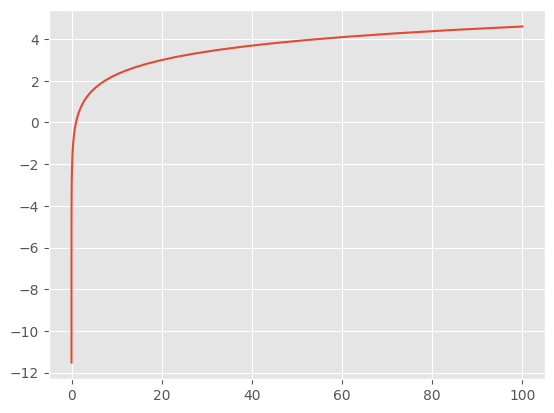

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, np.log(x))

## Neurona Logistica.

- $\hat{y} = \sigma(\mathbf{x} \cdot \mathbf{w}^T)$
- $\mathcal{L}(\mathbf{w})=-(y\log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$
- $\frac{d\mathcal{L(\mathbf{w})}}{d\mathbf{w}} = \mathbf{x}((1 - y) \hat{y} - (1 - \hat{y})y)$
- $w_{i + 1} = w_i - \alpha \frac{d\mathcal{L(\mathbf{w})}}{d\mathbf{w}}$

In [ ]:
!nvidia-smi

Sat Sep 20 17:36:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
plt.style.use("ggplot")

In [ ]:
FArray = NDArray[np.float64]
IArray = NDArray[np.int32]

def sigmoid(u: FArray) -> FArray:
    return 1.0 / (1 + np.exp(-u))

In [ ]:
def logistic(x: FArray, w: FArray) -> FArray:
    return sigmoid(x @ w.T)

In [ ]:
def binary_crossentropy(y: IArray, y_hat: FArray) -> float:
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

In [ ]:
def gradient(x: FArray, y: IArray, w: FArray) -> FArray:
    y_hat = logistic(x, w)
    return (x * ((1 - y) * y_hat - (1 - y_hat) * y)).mean(axis=0, keepdims=True)

In [ ]:
def init_weights(rng: np.random.Generator) -> FArray:
    return rng.standard_normal(size=(1, 3))

In [ ]:
x, y = make_blobs(
    n_samples=1000, n_features=2,
    centers=2, cluster_std=0.5, random_state=0
    )
x = np.concatenate([x, np.ones(shape=(x.shape[0], 1))], axis=1)
y = y.reshape(-1, 1)

In [ ]:
rng = np.random.default_rng(seed=0)
w = init_weights(rng)

In [ ]:
x.shape

(1000, 3)

In [ ]:
y.shape

(1000, 1)

In [ ]:
w.shape

(1, 3)

[Text(0.5, 0, '$x_1$'), Text(0, 0.5, '$x_2$')]

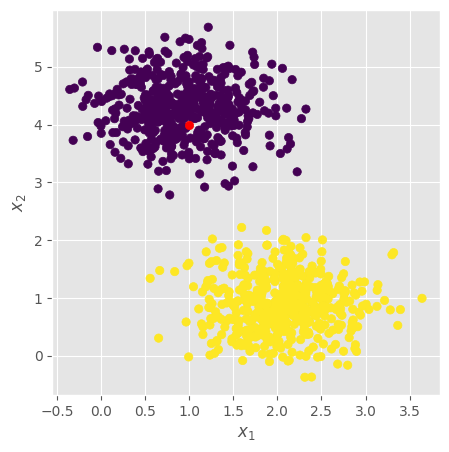

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x[:, 0], x[:, 1], c=y)
ax.scatter([1], [4], c="r")
ax.set(xlabel="$x_1$", ylabel="$x_2$")

In [ ]:
gradient(x, y, w)

array([[-0.05975099,  1.02645615,  0.11673385]])

In [ ]:
N_ITER = 1000
LEARNING_RATE = 0.1
loss = []
rng = np.random.default_rng(seed=1)
w = init_weights(rng)

for i in range(N_ITER):
    g = gradient(x, y, w)
    w = w - LEARNING_RATE * g
    loss.append(binary_crossentropy(y, logistic(x, w)))

[Text(0.5, 0, 'Iteracion'), Text(0, 0.5, 'Perdida')]

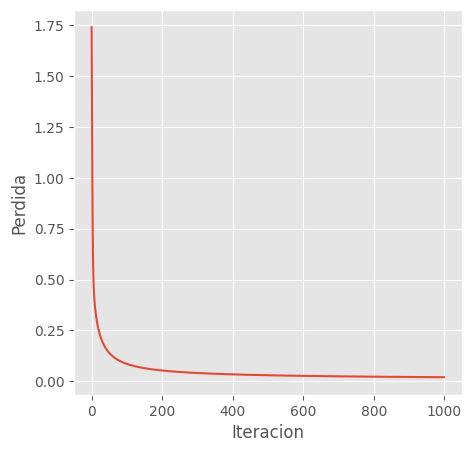

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(loss)
ax.set(xlabel="Iteracion", ylabel="Perdida")

In [ ]:
x1 = np.linspace(-0.5, 4, 100)
x2 = np.linspace(-0.5, 6, 100)
X1, X2 = np.meshgrid(x1, x2)

In [ ]:
x_grid = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
x_grid = np.concatenate([x_grid, np.ones(shape=(x_grid.shape[0], 1))], axis=1)
y_hat = logistic(x_grid, w)

In [ ]:
y_hat.shape

(10000, 1)

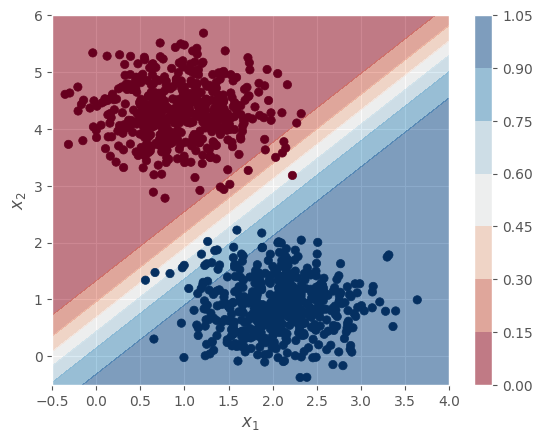

In [ ]:
fig, ax = plt.subplots()
cont = ax.contourf(X1, X2, y_hat.reshape(X1.shape), alpha=0.5, cmap="RdBu")
ax.scatter(x[:, 0], x[:, 1], c=y, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
fig.colorbar(cont)

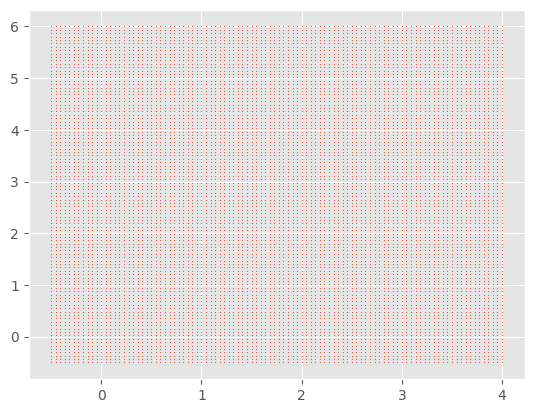

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_grid[:, 0], x_grid[:, 1], s=0.1)

In [ ]:
y_pred = (logistic(x, w) > 0.5).astype(np.int32)

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
model = LogisticRegression().fit(x[:, :2], y.flatten())

In [ ]:
x1 = np.linspace(-0.5, 4, 100)
x2 = np.linspace(-0.5, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
x_grid = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)
y_hat = model.predict_proba(x_grid)[:, 1]
y_hat.shape

(10000,)

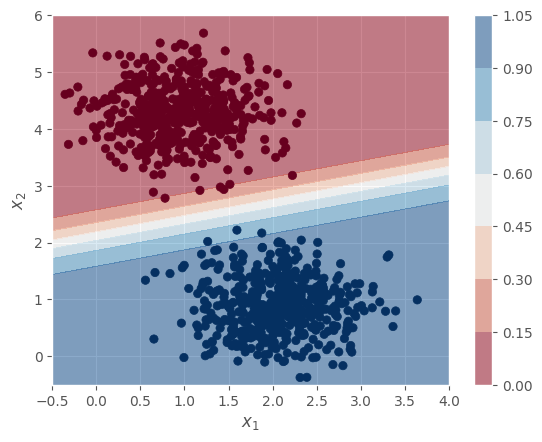

In [ ]:
fig, ax = plt.subplots()
cont = ax.contourf(X1, X2, y_hat.reshape(X1.shape), alpha=0.5, cmap="RdBu")
ax.scatter(x[:, 0], x[:, 1], c=y, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
fig.colorbar(cont)

In [ ]:
x = torch.tensor([
    [1, 2],
    [3, 4]
])

In [ ]:
x

tensor([[1, 2],
        [3, 4]])

In [ ]:
x.dtype

torch.int64

In [ ]:
x @ x.T

tensor([[ 5, 11],
        [11, 25]])

In [ ]:
x.device

device(type='cpu')

In [ ]:
x_gpu = x.to("cuda")

In [ ]:
x_gpu

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [ ]:
x = torch.randn(size=(1000, 1000))
x_gpu = x.to("cuda")

In [ ]:
%%timeit
x @ x.T

18 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
x_gpu @ x_gpu.T

572 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


$$
f(x) = x ^2 + 2\\
\frac{df}{dx} = 2x
$$

In [ ]:
x = torch.tensor([2.0], requires_grad=True)

In [ ]:
x

tensor([2.], requires_grad=True)

In [ ]:
y = x ** 2 + 2

In [ ]:
y.backward()

In [ ]:
float(x.grad)

4.0

In [ ]:
x = torch.tensor([2.0], requires_grad=True, device=torch.device("cuda:0"))

In [ ]:
x

tensor([2.], device='cuda:0', requires_grad=True)

In [ ]:
y = x ** 2 + 2

In [ ]:
y.backward()

In [ ]:
x.grad

tensor([4.], device='cuda:0')

In [ ]:
def init_weights() -> torch.Tensor:
    return torch.randn(size=(1, 3))

In [ ]:
def sigmoid(u: torch.Tensor) -> torch.Tensor:
    return 1.0 / (1 + torch.exp(-u))

In [ ]:
def logistic(x: torch.Tensor, w: torch.Tensor) -> torch.Tensor:
    return sigmoid(x @ w.T)

In [ ]:
def binary_crossentropy(y: torch.Tensor, y_hat: torch.Tensor) -> torch.Tensor:
    return -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat)).mean()

In [ ]:
x, y = make_blobs(
    n_samples=1000, n_features=2,
    centers=2, cluster_std=0.5, random_state=0
    )
x = np.concatenate([x, np.ones(shape=(x.shape[0], 1))], axis=1)
y = y.reshape(-1, 1)

In [ ]:
x_torch = torch.tensor(x, device=torch.device("cuda:0"), dtype=torch.float32)
y_torch = torch.tensor(y, device=torch.device("cuda:0"), dtype=torch.float32)

In [ ]:
x_torch.dtype

torch.float32

In [ ]:
w.dtype

torch.float32

In [ ]:
N_ITER = 100
LEARNING_RATE = 1
loss = []
w = init_weights().to("cuda")
for i in range(N_ITER):
    w = w.detach().clone().requires_grad_(True)
    y_hat = logistic(x_torch, w)
    cur_loss = binary_crossentropy(y_torch, y_hat)
    cur_loss.backward()
    w = w - LEARNING_RATE * w.grad
    loss.append(cur_loss.detach().to("cpu").numpy())

[Text(0.5, 0, 'Iteracion'), Text(0, 0.5, 'Perdida')]

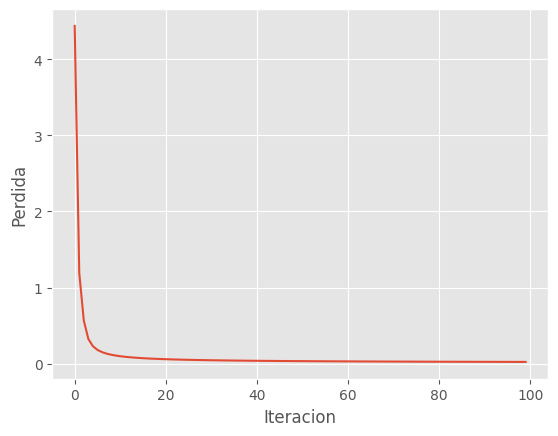

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(loss))
ax.set(xlabel="Iteracion", ylabel="Perdida")